## Data Cleaning and Observations 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sem
import numpy as np
from scipy.stats import linregress
from scipy.stats import f_oneway
import scipy.stats as stats

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')

# Display the data table for preview
combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
number_mice = combined_df["Mouse ID"].nunique()
number_mice

249

In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_combined_df = combined_df.drop_duplicates(subset=['Mouse ID', 'Timepoint'], keep='first')
new_combined_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Export raw to html
# html = new_combined_df.to_html(index=False)
# print(html)

In [7]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate = combined_df[['Mouse ID','Timepoint']].duplicated(keep='first')
combined_df[duplicate]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [8]:
# Checking the number of mice in the clean DataFrame.
number_mice = new_combined_df["Mouse ID"].nunique()
number_mice

249

## Summary Statistics

In [9]:
# Groupby Drug Regimen
regimen_df = new_combined_df.groupby("Drug Regimen")

In [10]:
# Generate a summary statistics table of mean, median, variance,  standard deviation, and SEM 
# of the tumor volume for each regimen
mean = regimen_df["Tumor Volume (mm3)"].mean()
median = regimen_df["Tumor Volume (mm3)"].median()
variance = regimen_df["Tumor Volume (mm3)"].var()
std = regimen_df["Tumor Volume (mm3)"].std()
sem = regimen_df["Tumor Volume (mm3)"].sem()
summary_df = pd.DataFrame({"Mean":mean, "Median":median,
                           "Variance":variance,"Standard Deviation":std,
                           "Standard Error" : sem
                          })
summary_df = summary_df.sort_values("Mean")
summary_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [11]:
# Export summary to html
# html = summary_df.to_html()
# print(html)

## Bar and Pie Charts

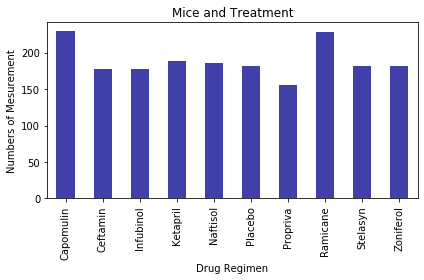

In [81]:
# Generate a bar plot showing the total number of mice for each treatment throughout
# the course of the study using pyplot.
regimen_df["Mouse ID"].count().plot.bar(facecolor = "darkblue", alpha=0.75, align="center")
plt.title("Mice and Treatment")
plt.xlabel("Drug Regimen")
plt.ylabel("Numbers of Mesurement")

plt.tight_layout()
plt.savefig("01.jpg")

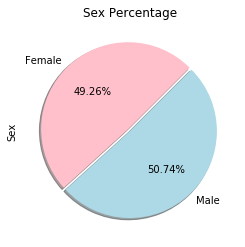

In [55]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex_df = new_combined_df.groupby("Sex")
total_mice = sex_df["Sex"].count()
colors = ["pink", "lightblue"]
explode = [0.03, 0]
total_mice.plot.pie(explode = explode, colors = colors, autopct="%1.2f%%",
                    shadow = True, startangle = 45)
plt.title("Sex Percentage")
plt.savefig("02.jpg")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the begining final tumor volume of each mouse across five of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, Propriva,and Ceftamin

In [15]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
least_timepoint = new_combined_df.groupby(['Mouse ID'])['Timepoint'].transform(min) == new_combined_df['Timepoint']
min_df = new_combined_df[least_timepoint]
min_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0


In [16]:
# Groupby the regimens
regimen_min_df = min_df.groupby("Drug Regimen")

In [17]:
mean = regimen_min_df["Tumor Volume (mm3)"].mean()
median = regimen_min_df["Tumor Volume (mm3)"].median()
variance = regimen_min_df["Tumor Volume (mm3)"].var()
std = regimen_min_df["Tumor Volume (mm3)"].std()
sem = regimen_min_df["Tumor Volume (mm3)"].sem()
summary_min_df = pd.DataFrame({"Mean":mean, "Median":median,
                           "Variance":variance,"Standard Deviation":std,
                           "Standard Error" : sem
                          })
summary_min_df = summary_min_df.sort_values("Mean")
summary_min_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Capomulin,45.0,45.0,0.0,0.0,0.0
Ceftamin,45.0,45.0,0.0,0.0,0.0
Infubinol,45.0,45.0,0.0,0.0,0.0
Ketapril,45.0,45.0,0.0,0.0,0.0
Naftisol,45.0,45.0,0.0,0.0,0.0
Placebo,45.0,45.0,0.0,0.0,0.0
Propriva,45.0,45.0,0.0,0.0,0.0
Ramicane,45.0,45.0,0.0,0.0,0.0
Stelasyn,45.0,45.0,0.0,0.0,0.0


In [20]:
# Export before intervention to html
# html_min = summary_min_df.to_html()
# print(html_min)

In [21]:
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
greatest_timepoint = new_combined_df.groupby(['Mouse ID'])['Timepoint'].transform(max) == new_combined_df['Timepoint']
max_df = new_combined_df[greatest_timepoint]
max_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [17]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

In [22]:
# Groupby Drug Regimen
regimen_max_df = max_df.groupby("Drug Regimen")

In [23]:
mean = regimen_max_df["Tumor Volume (mm3)"].mean()
median = regimen_max_df["Tumor Volume (mm3)"].median()
variance = regimen_max_df["Tumor Volume (mm3)"].var()
std = regimen_max_df["Tumor Volume (mm3)"].std()
sem = regimen_max_df["Tumor Volume (mm3)"].sem()
summary_max_df = pd.DataFrame({"Mean":mean, "Median":median,
                           "Variance":variance,"Standard Deviation":std,
                           "Standard Error" : sem
                          })
summary_max_df = summary_df.sort_values("Mean")
summary_max_df

,Mean,Median,Variance,Standard Deviation,Standard Error
Drug Regimen,,,,,
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Zoniferol,53.236507,51.818479,48.533355,6.966589,0.516398
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [52]:
# Export max time point to html
# html_max = summary_max_df.to_html()
# print(html_max )

In [25]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset 
# Determine outliers using upper and lower bounds

In [27]:
# Pulling up greatest time point data
greatest_timepoint = new_combined_df.groupby(['Mouse ID'])['Timepoint'].transform(max) == new_combined_df['Timepoint']
new_df = new_combined_df[greatest_timepoint]
new_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
9,k403,Ramicane,Male,21,16,45,22.050126,1
19,s185,Capomulin,Female,3,17,45,23.343598,1
29,x401,Capomulin,Female,16,15,45,28.484033,0
39,m601,Capomulin,Male,22,17,45,28.430964,1
49,g791,Ramicane,Male,11,16,45,29.128472,1


In [28]:
# Capomulin
capomulin_df = new_df.loc[new_df["Drug Regimen"] == "Capomulin", :]
quartiles_capomulin = capomulin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])

In [29]:
# Ramicane
ramicane_df = new_df.loc[new_df["Drug Regimen"] == "Ramicane", :]
quartiles_ramicane = ramicane_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])

In [30]:
# Infubinol
infubinol_df = new_df.loc[new_df["Drug Regimen"] == "Infubinol", :]
quartiles_infubinol = infubinol_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])

In [31]:
# Ceftamin
ceftamin_df = new_df.loc[new_df["Drug Regimen"] == "Ceftamin", :]
quartiles_ceftamin = ceftamin_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])

In [32]:
# Propriva
propriva_df = new_df.loc[new_df["Drug Regimen"] == "Propriva", :]
quartiles_propriva = propriva_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])

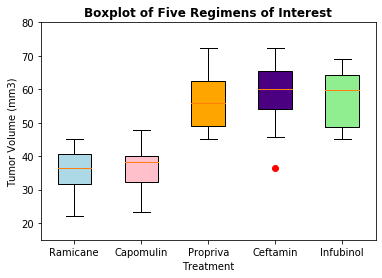

In [87]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest.
data = [ramicane_df["Tumor Volume (mm3)"],capomulin_df["Tumor Volume (mm3)"],
        propriva_df["Tumor Volume (mm3)"],infubinol_df["Tumor Volume (mm3)"], 
        ceftamin_df["Tumor Volume (mm3)"]]
labels = ["Ramicane","Capomulin", "Propriva", "Ceftamin", "Infubinol"]

fig, ax = plt.subplots()
plot = ax.boxplot(data, patch_artist=True,labels=labels,sym='red')
plt.title("Boxplot of Five Regimens of Interest",fontsize=12, weight="bold")
plt.xlabel("Treatment")
plt.ylabel("Tumor Volume (mm3)")
ax.set_ylim(15,80)

colors = ['lightblue', 'pink', 'orange','indigo','lightgreen'] 
for patch, color in zip(plot["boxes"], colors):
    patch.set_facecolor(color)
plt.savefig("03.jpg")

## Line and Scatter Plots

The r-squared is: 0.7088568047708717.


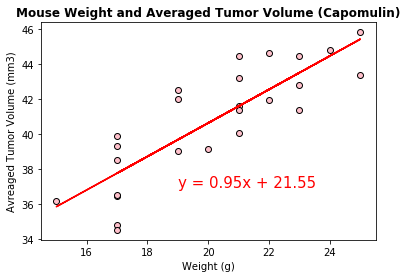

In [57]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin treatment regimen.
new_df = new_combined_df.groupby(["Mouse ID","Weight (g)","Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].mean()
capomulin_3_df= new_df.loc[new_df["Drug Regimen"] == "Capomulin", :]
x_value = capomulin_3_df["Weight (g)"]
y_value = capomulin_3_df["Tumor Volume (mm3)"]

plt.scatter(x_value, y_value, marker="o", facecolors="pink", edgecolors="black")
# plt.xlim(13,30)
# plt.ylim(32,59)
plt.title("Mouse Weight and Averaged Tumor Volume (Capomulin)",fontsize=12, weight="bold")
plt.xlabel("Weight (g)")
plt.ylabel("Avreaged Tumor Volume (mm3)")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value, y_value)
regress_values = x_value * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the regression line
plt.plot(x_value,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,37),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
# plt.savefig("04.jpg")

The r-squared is: 0.6496844667454369.


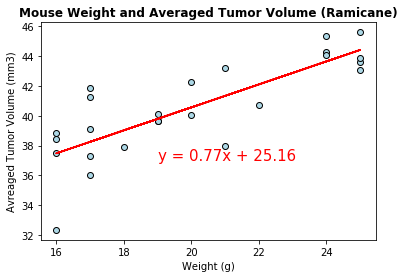

In [58]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Ramicane treatment regimen.
new_df = new_combined_df.groupby(["Mouse ID","Weight (g)","Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].mean()
Ramicane_3_df= new_df.loc[new_df["Drug Regimen"] == "Ramicane", :]
x_value_2 = Ramicane_3_df["Weight (g)"]
y_value_2 = Ramicane_3_df["Tumor Volume (mm3)"]

plt.scatter(x_value_2, y_value_2, marker="o", facecolors="lightblue", edgecolors="black")
# plt.xlim(13,30)
# plt.ylim(32,59)
plt.title("Mouse Weight and Averaged Tumor Volume (Ramicane)",fontsize=12, weight="bold")
plt.xlabel("Weight (g)")
plt.ylabel("Avreaged Tumor Volume (mm3)")
# Linear regression model
# Get weight as x value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_2, y_value_2)
regress_values = x_value_2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
plt.plot(x_value_2,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(19,37),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
# plt.savefig("05.jpg")

The r-squared is: 0.00907441438982291.


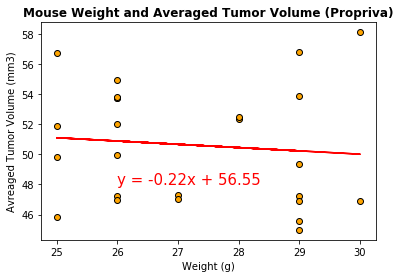

In [59]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Propriva treatment regimen.
new_df = new_combined_df.groupby(["Mouse ID","Weight (g)","Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].mean()
Propriva_3_df= new_df.loc[new_df["Drug Regimen"] == "Propriva", :]
x_value_5 = Propriva_3_df["Weight (g)"]
y_value_5 = Propriva_3_df["Tumor Volume (mm3)"]

plt.scatter(x_value_5, y_value_5, marker="o", facecolors="orange", edgecolors="black")
# plt.xlim(13,26)
# plt.ylim(34,48)
plt.title("Mouse Weight and Averaged Tumor Volume (Propriva)",fontsize=12, weight="bold")
plt.xlabel("Weight (g)")
plt.ylabel("Avreaged Tumor Volume (mm3)")
# Linear regression model
# Get weight as x value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_5, y_value_5)
regress_values = x_value_5 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
plt.plot(x_value_5,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(26,48),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
# plt.savefig("06.jpg")

The r-squared is: 0.003182395660256426.


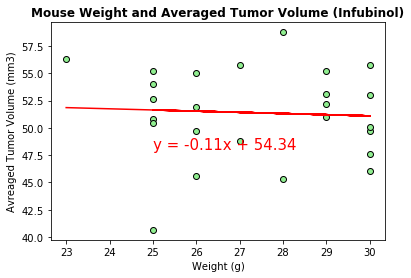

In [60]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Infubinol treatment regimen.
new_df = new_combined_df.groupby(["Mouse ID","Weight (g)","Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].mean()
Infubinol_3_df= new_df.loc[new_df["Drug Regimen"] == "Infubinol", :]
x_value_3 = Infubinol_3_df["Weight (g)"]
y_value_3 = Infubinol_3_df["Tumor Volume (mm3)"]

plt.scatter(x_value_3, y_value_3, marker="o", facecolors="lightgreen", edgecolors="black")
# plt.xlim(13,26)
# plt.ylim(34,48)
plt.title("Mouse Weight and Averaged Tumor Volume (Infubinol)",fontsize=12, weight="bold")
plt.xlabel("Weight (g)")
plt.ylabel("Avreaged Tumor Volume (mm3)")
# Linear regression model
# Get weight as x value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_3, y_value_3)
regress_values = x_value_3 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
plt.plot(x_value_3,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(25,48),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
# plt.savefig("07.jpg")

The r-squared is: 0.0012799695251514232.


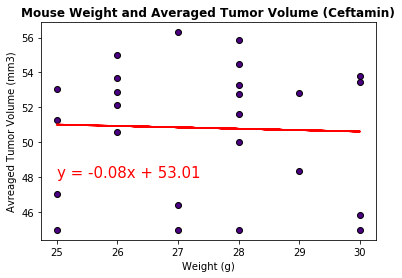

In [61]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Ceftamin treatment regimen.
new_df = new_combined_df.groupby(["Mouse ID","Weight (g)","Drug Regimen"], as_index=False)["Tumor Volume (mm3)"].mean()
Ceftamin_3_df= new_df.loc[new_df["Drug Regimen"] == "Ceftamin", :]
x_value_4 = Ceftamin_3_df["Weight (g)"]
y_value_4 = Ceftamin_3_df["Tumor Volume (mm3)"]

plt.scatter(x_value_4, y_value_4, marker="o", facecolors="indigo", edgecolors="black")
# plt.xlim(13,26)
# plt.ylim(34,48)
plt.title("Mouse Weight and Averaged Tumor Volume (Ceftamin)",fontsize=12, weight="bold")
plt.xlabel("Weight (g)")
plt.ylabel("Avreaged Tumor Volume (mm3)")
# Linear regression model
# Get weight as x value
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_value_4, y_value_4)
regress_values = x_value_4 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot the regression line
plt.plot(x_value_4,regress_values,"r-")
# Print the equation
plt.annotate(line_eq,(25,48),fontsize=15,color="red")
print(f"The r-squared is: {rvalue**2}.")
# plt.savefig("08.jpg")

## Correlation

In [39]:
# Correlation coefficient for Capomulin 
data_df = pd.DataFrame({"Weight" : x_value,
        "Averaged Tumor Volume" : y_value})
corrrelation = data_df.corr(method="pearson")
print (corrrelation)

                         Weight  Averaged Tumor Volume
Weight                 1.000000               0.841936
Averaged Tumor Volume  0.841936               1.000000


In [40]:
# Correlation coefficient Ramicane
data_df = pd.DataFrame({"Weight" : x_value_2,
        "Averaged Tumor Volume" : y_value_2})
corrrelation = data_df.corr(method="pearson")
print (corrrelation)

                        Weight  Averaged Tumor Volume
Weight                 1.00000                0.80603
Averaged Tumor Volume  0.80603                1.00000


In [41]:
# Correlation coefficient for Infubinol 
data_df = pd.DataFrame({"Weight" : x_value_3,
        "Averaged Tumor Volume" : y_value_3})
corrrelation = data_df.corr(method="pearson")
print (corrrelation)

                         Weight  Averaged Tumor Volume
Weight                 1.000000              -0.056413
Averaged Tumor Volume -0.056413               1.000000


In [42]:
# Correlation coefficient for Ceftamin
data_df = pd.DataFrame({"Weight" : x_value_4,
        "Averaged Tumor Volume" : y_value_4})
corrrelation = data_df.corr(method="pearson")
print (corrrelation)

                         Weight  Averaged Tumor Volume
Weight                 1.000000              -0.035777
Averaged Tumor Volume -0.035777               1.000000


In [43]:
# Correlation coefficient for Propriva
data_df = pd.DataFrame({"Weight" : x_value_5,
        "Averaged Tumor Volume" : y_value_5})
corrrelation = data_df.corr(method="pearson")
print (corrrelation)

                        Weight  Averaged Tumor Volume
Weight                 1.00000               -0.09526
Averaged Tumor Volume -0.09526                1.00000


## One-Way Anova for Infubinol, Ceftamin and Propriva

In [48]:
f_oneway(ramicane_df["Tumor Volume (mm3)"],capomulin_df["Tumor Volume (mm3)"],
        propriva_df["Tumor Volume (mm3)"],infubinol_df["Tumor Volume (mm3)"], 
        ceftamin_df["Tumor Volume (mm3)"])

F_onewayResult(statistic=60.30731741514221, pvalue=7.89592421701107e-28)

## T-test for Capomulin  and Ramicane

In [39]:
stats.ttest_ind(ramicane_df["Tumor Volume (mm3)"], capomulin_df["Tumor Volume (mm3)"], equal_var=False)

Ttest_indResult(statistic=-0.2957001681657849, pvalue=0.7687346115593106)